#Día 7

##Temario
- Manipulación de datos
- Limpieza de datos
- Introducción a la regresión lineal

##Datos


In [33]:
import pandas as pd
import numpy as np

In [34]:
data = {
    "nombre": ["Ana", "Juan", "Pedro", "María", "Luis", None],
    "edad": [23, 35, None, 29, 41, 30],
    "ciudad": ["CDMX", "cdmx", "Monterrey   ", "GDL", "  gdl", "CDMX"],
    "ingresos": ["$12,000", "$18,500", "$15,300", None, "$22000.", "$17800."]
}

##Manipulación de datos

In [35]:
# nota: para importar un .csv se usa el:
#variable = pd.read.csv("Nombre.Archivo.csv")
df = pd.DataFrame(data)
df

,nombre,edad,ciudad,ingresos
0,Ana,23.0,CDMX,"$12,000"
1,Juan,35.0,cdmx,"$18,500"
2,Pedro,NaN,Monterrey,"$15,300"
3,María,29.0,GDL,None
4,Luis,41.0,gdl,$22000.
5,None,30.0,CDMX,$17800.


###¿Qué es un data frame?
Es una tabla de datos: filas (registros) y columnas (variables)

In [36]:
#Exploración de los datos
df.head() #permite darse una idea de los datos

,nombre,edad,ciudad,ingresos
0,Ana,23.0,CDMX,"$12,000"
1,Juan,35.0,cdmx,"$18,500"
2,Pedro,NaN,Monterrey,"$15,300"
3,María,29.0,GDL,None
4,Luis,41.0,gdl,$22000.


In [37]:
#Si deseas ver las columnas puedes hacerlo con
df.columns

Index(['nombre', 'edad', 'ciudad', 'ingresos'], dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nombre    5 non-null      object 
 1   edad      5 non-null      float64
 2   ciudad    6 non-null      object 
 3   ingresos  5 non-null      object 
dtypes: float64(1), object(3)
memory usage: 324.0+ bytes


In [39]:
df.describe(include="all")  #te da una mera descripción de todos

,nombre,edad,ciudad,ingresos
count,5,5.00000,6,5
unique,5,NaN,5,5
top,Ana,NaN,CDMX,"$12,000"
freq,1,NaN,2,1
mean,NaN,31.60000,NaN,NaN
std,NaN,6.76757,NaN,NaN
min,NaN,23.00000,NaN,NaN
25%,NaN,29.00000,NaN,NaN
50%,NaN,30.00000,NaN,NaN
75%,NaN,35.00000,NaN,NaN


In [40]:
df["edad"]

,edad
0,23.0
1,35.0
2,NaN
3,29.0
4,41.0
5,30.0


In [41]:
df[df["edad"]>30]

,nombre,edad,ciudad,ingresos
1,Juan,35.0,cdmx,"$18,500"
4,Luis,41.0,gdl,$22000.


In [42]:
print(df)
df[
   (df["edad"]>18) &
   (df["ingresos"] != "$22,000.") &
   (df["nombre"] != "Juan")
]

  nombre  edad        ciudad ingresos
0    Ana  23.0          CDMX  $12,000
1   Juan  35.0          cdmx  $18,500
2  Pedro   NaN  Monterrey     $15,300
3  María  29.0           GDL     None
4   Luis  41.0           gdl  $22000.
5   None  30.0          CDMX  $17800.


,nombre,edad,ciudad,ingresos
0,Ana,23.0,CDMX,"$12,000"
3,María,29.0,GDL,None
4,Luis,41.0,gdl,$22000.
5,None,30.0,CDMX,$17800.


In [43]:
#Uso de count(), mean(), sum(), fillna(), str.replace(), astype()
print(df["edad"].count()) #son 6, pero 1 es None
print("----------------------------")
print(df["edad"].mean())  #promedio
print("----------------------------")
print(df["edad"].sum()) #suma
print("----------------------------")
print(df["nombre"].fillna("Desconocido")) #rellena los valores None, con lo que nosotros busquemos
print("----------------------------")
print(df["ingresos"].str.replace("$","").str.replace(",","").astype(float))
#.str.replace() reemplaza x símbolo por y
#.astype() cambia el tipo de dato de la columna
#como todo se está realizando en print, no se está modificando dentro del df

5
----------------------------
31.6
----------------------------
158.0
----------------------------
0            Ana
1           Juan
2          Pedro
3          María
4           Luis
5    Desconocido
Name: nombre, dtype: object
----------------------------
0    12000.0
1    18500.0
2    15300.0
3        NaN
4    22000.0
5    17800.0
Name: ingresos, dtype: float64


##Limpieza de Datos

In [44]:
df_clean = df.copy()
print(df_clean)
#Rellenar valores faltantes
df_clean["edad"] = df_clean["edad"].fillna(df_clean["edad"].mean())
df_clean["ingresos"] = df_clean["ingresos"].fillna("$0")
df_clean["nombre"] = df_clean["nombre"].fillna("Desconocido")
df_clean

  nombre  edad        ciudad ingresos
0    Ana  23.0          CDMX  $12,000
1   Juan  35.0          cdmx  $18,500
2  Pedro   NaN  Monterrey     $15,300
3  María  29.0           GDL     None
4   Luis  41.0           gdl  $22000.
5   None  30.0          CDMX  $17800.


,nombre,edad,ciudad,ingresos
0,Ana,23.0,CDMX,"$12,000"
1,Juan,35.0,cdmx,"$18,500"
2,Pedro,31.6,Monterrey,"$15,300"
3,María,29.0,GDL,$0
4,Luis,41.0,gdl,$22000.
5,Desconocido,30.0,CDMX,$17800.


In [45]:
print(df)
print(df_clean)

  nombre  edad        ciudad ingresos
0    Ana  23.0          CDMX  $12,000
1   Juan  35.0          cdmx  $18,500
2  Pedro   NaN  Monterrey     $15,300
3  María  29.0           GDL     None
4   Luis  41.0           gdl  $22000.
5   None  30.0          CDMX  $17800.
        nombre  edad        ciudad ingresos
0          Ana  23.0          CDMX  $12,000
1         Juan  35.0          cdmx  $18,500
2        Pedro  31.6  Monterrey     $15,300
3        María  29.0           GDL       $0
4         Luis  41.0           gdl  $22000.
5  Desconocido  30.0          CDMX  $17800.


In [46]:
df_clean["ciudad"] = (
    df_clean["ciudad"]
    .str.lower()  #todo en minúsculas o .str.upper() para todo en mayúsculas
    .str.strip()  #quita espacios
)

In [47]:
#Ahora con los datos limpios podemos trabajar con ellos
#Ejercicio Rápido
# 1)Saca los nombre de todos
# 2)Saca los nombres de todos sin los que digan desconocidos
# 3)Saca la cantidad de personas que hay por medio de ciudad
# Ahora pondremos uno un poco más dificil
# 4)Saca TODOS los datos donde no se muestre desconocido, donde no se muestren los que son de monterrey en ciudad
# y donde no se muestre los ingresos que sean $0
# 5)Saca la edad promedio de las personas que no son de la ciudad de cdmx que ganan mayor o igual que $10,000


In [48]:
#1
df_clean["nombre"]

,nombre
0,Ana
1,Juan
2,Pedro
3,María
4,Luis
5,Desconocido


In [50]:
#2
df_clean[df_clean["nombre"] != "Desconocido"]["nombre"]

,nombre
0,Ana
1,Juan
2,Pedro
3,María
4,Luis


In [51]:
#3
df_clean["ciudad"].count()

np.int64(6)

In [52]:
#4
df_clean[(df_clean["nombre"] != "Desconocido") & (df_clean["ciudad"] != "monterrey") & (df_clean["ingresos"] != "$0")]

,nombre,edad,ciudad,ingresos
0,Ana,23.0,cdmx,"$12,000"
1,Juan,35.0,cdmx,"$18,500"
4,Luis,41.0,gdl,$22000.


In [57]:
#5
df_clean[(df_clean["ciudad"] != "cdmx") & (df_clean["ingresos"] != "$0")]["edad"].mean()

np.float64(36.3)

In [64]:
#Limpiemos una última vez el data frame inicial para iniciar con regresión lineal
df_clean["ingresos"] = df["ingresos"].str.replace("$","").str.replace(",","").astype(float).fillna(0)


In [65]:
df_clean

,nombre,edad,ciudad,ingresos
0,Ana,23.0,cdmx,12000.0
1,Juan,35.0,cdmx,18500.0
2,Pedro,31.6,monterrey,15300.0
3,María,29.0,gdl,0.0
4,Luis,41.0,gdl,22000.0
5,Desconocido,30.0,cdmx,17800.0


#Introducción a la regresión lineal

In [60]:
from sklearn.linear_model import LinearRegression

##¿Qué es una regresión lineal?
Una regresión intenta predecir un valor numérico a partir de otros datos

Ejemplo:
- Predecir ingresos según edad
- Predecir precio según tamaño

Aquí usaremos regresión lineal: el tipo más simple

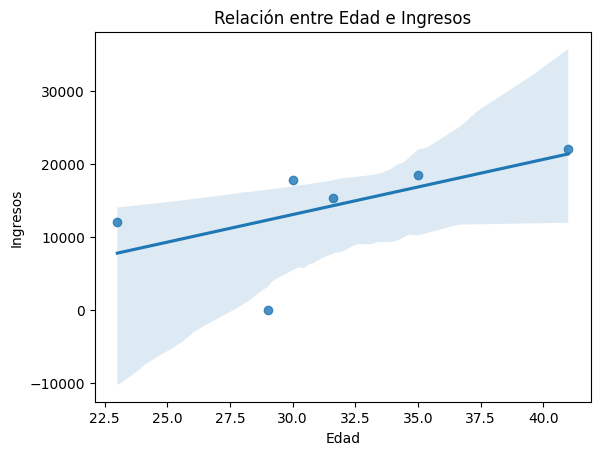

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x = df_clean["edad"], y = df_clean["ingresos"])
plt.xlabel("Edad")
plt.ylabel("Ingresos")
plt.title("Relación entre Edad e Ingresos")
plt.show()

In [67]:
#Matriz de correlación
#df_clean.corr()
df_clean[["edad","ingresos"]].corr()

#0.0 = no tiene casi ninguna correlación
#0.3 -> débil
#0.5 - 0.7 -> moderada
# >0.8 -> fuerte

,edad,ingresos
edad,1.000000,0.588779
ingresos,0.588779,1.000000


In [68]:
x = df_clean[["edad"]]
y = df_clean[["ingresos"]]
modelo = LinearRegression()
modelo.fit(x,y)

LinearRegression()

Tiene relación con la forma de la pendiente
¿Qué hace fit? Busca los valores de m, y b que mejor se ajustan a tus datos. Minimiza el error entre los ingresos reales y los ingresos predichos.

In [70]:
edad_nueva = [[30]]
prediccion = modelo.predict(edad_nueva)
print(prediccion)

[[13061.25181951]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [71]:
#Podemos evaluar el modelo
from sklearn.metrics import r2_score, mean_squared_error
y_pred = modelo.predict(x) #son los ingresos que el modelo cree que son según la edad
#ingresos = β0 + β1 · edad
#β0 → intercepto
#β1 → coeficiente de edad
r2 = r2_score(y,y_pred)
#0.3-0.5 la regresión es medianamente aceptable, pero siempre es mejor un modelo entre 0.6-0.8
#o muy bueno un modelo mayor de 0.8 en su r^2
mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
print(r2)
#Regresion logística se suele usar -> Accuracy, Precision, F1 Score, Recall, Roc Auc

0.34666091920946085
